In [42]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = datasets.load_iris()

In [8]:
X = df.data
y = df.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
def createMLP(hidden_layer_sizes=(1,), learning_rate=1, batch_size=1, activation='relu', max_iter=50):
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
                         learning_rate_init=learning_rate,
                         batch_size=batch_size,
                         activation=activation,
                         max_iter=max_iter
            )
    return model

In [46]:
pars =  [[(5,), 0.001, 1, 'logistic', 30],
        [(8,), 0.005, 1, 'relu', 25],
        [(4,), 0.001, 1, 'relu', 50],
        [(7,2), 0.005, 1, 'logistic', 10],
        [(8,2), 0.001, 1, 'relu', 40],
        [(3,3), 0.005, 1, 'logistic', 30]]

In [47]:
f_scores = []
cms = []
accs = []

In [48]:
for params in pars:
    model = createMLP(*params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f_scores.append(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))
    cms.append(confusion_matrix(y_true=y_test, y_pred=y_pred))
    accs.append(accuracy_score(y_true=y_test, y_pred=y_pred))

C:\Users\Inventario-LSE\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Inventario-LSE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
better_f1_score_index = f_scores.index(max(f_scores))
print(cms[better_f1_score_index])

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]


In [ ]:
print(np.mean(f1_scores))
print(np.median(f1_scores))

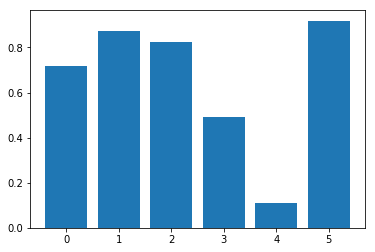

In [55]:
plt.bar(range(6), f_scores)
plt.show()

In [51]:
print(np.mean(f_scores[:3]))
print(np.mean(f_scores[3:]))

0.8043893651736789
0.5077492877492877
